In [1]:
import os, sys
sys.path.append(os.path.expanduser('~/repos/ReipurthBallyProject/src'))
sys.path.append(os.path.expanduser('~/repos/runawaysearch/src'))
from gaiastars import gaiastars as gs
import astropy.units as u

In [2]:
import pandas as pd
df = pd.read_csv('../lists/pleiades-id.csv')
pleiades_members = df.source_id.to_list()
pleiades = gs(name='Pleiades Members', description='from Columbia Paper')
pleiades.from_source_idlist(pleiades_members)

INFO: Query finished. [astroquery.utils.tap.core]


In [3]:
from cross_match import cross_match
from gaia_ps1 import *
from PanSTARRS import PanSTARRS1

In [4]:
pleiades_ps1_objids = gaiadr3toPanStarrs1(pleiades_members)

INFO: Query finished. [astroquery.utils.tap.core]


In [5]:
ps1_idlist = list(pleiades_ps1_objids['original_ext_source_id'][~pleiades_ps1_objids['source_id'].mask])
pleiades_ps1 = PanSTARRS1(name='Gaia Cross Match')
pleiades_ps1.from_source_id_list(ps1_idlist)

Query returned 801 records


In [7]:
xmatch_tbl = cross_match(Table.from_pandas(pleiades.objs), pleiades_ps1.objs, pleiades_ps1_objids )

In [10]:
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'HR Diagrams\nPleiades Member List')

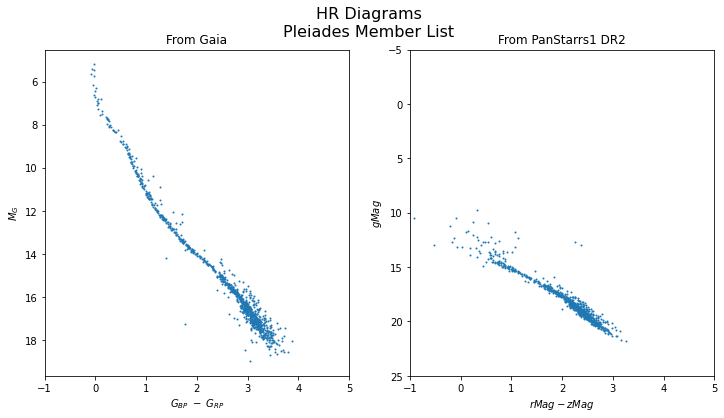

In [26]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
pleiades.plot_hrdiagram(ax=ax, title='From Gaia',absmag=False)
ax = fig.add_subplot(122)
pleiades_ps1.plot_hrdiagram(ax=ax, title='From PanStarrs1 DR2')
fig.suptitle('HR Diagrams\nPleiades Member List', size=16)

Text(0.5, 0.98, 'Filter Magnitude Comparison\nPleiades Member List')

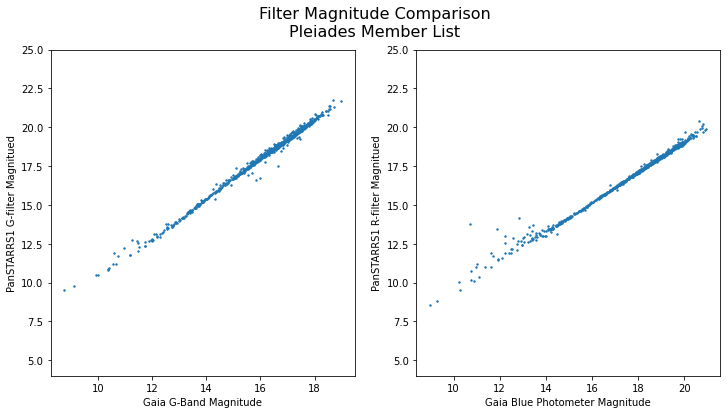

In [27]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
plt.scatter(xmatch_tbl['phot_g_mean_mag'], xmatch_tbl['gMeanPSFMag'], s=2)
ax.set_ylim(4, 25)
ax.set_xlabel('Gaia G-Band Magnitude')
ax.set_ylabel('PanSTARRS1 G-filter Magnitued')

ax = fig.add_subplot(122)

plt.scatter(xmatch_tbl['phot_bp_mean_mag'], xmatch_tbl['rMeanPSFMag'],s=2)
ax.set_ylim(4, 25)
ax.set_xlabel('Gaia Blue Photometer Magnitude')
ax.set_ylabel('PanSTARRS1 R-filter Magnitued')

fig.suptitle('Filter Magnitude Comparison\nPleiades Member List', size=16)